In [1]:
import tensorflow as tf2

net = tf2.keras.applications.mobilenet_v2.MobileNetV2(
    input_shape=(64, 64, 3),
    alpha=1.0,
    include_top=True,
    weights=None,
    input_tensor=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax',
)

2023-03-27 18:12:44.720792: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-27 18:12:45.780750: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ros/noetic/lib:/home/patryk/miniconda3/envs/stereo-vision/lib/:/home/patryk/miniconda3/envs/stereo-vision/lib/:/home/patryk/miniconda3/envs/stereo-vision/lib/
2023-03-27 18:12:45.780801: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such fi

In [2]:
print(net)

In [2]:
from pathlib import Path
import os
node_root =  Path(os.getcwd()).parent.absolute()
print(node_root)

/home/patryk/putm_workspace/src/putm_vision


In [4]:
import os
import json
import numpy as np
from PIL import Image

root = os.getcwd()
print(f"Root is: {root}")

train_data_path = root + "/train"
print(f"Train data is: {train_data_path}")

width_sum = 0
height_sum = 0

photos = 0

data_path = train_data_path + "/data/"

for team in os.scandir(train_data_path):
    for subdir in os.scandir(team):
        if subdir.name == "ann" and subdir.is_dir:
            for file in os.scandir(subdir):
                
                f = open(file.path)
                j = json.loads(f.read())
                
                for obj in j["objects"]:
                    folder_path = data_path + obj["classTitle"] + "/"
                    if not os.path.exists(folder_path):
                        os.mkdir(folder_path)

                    img_path = team.path + "/img/" + file.name.replace(".json", "")
                    if not os.path.exists(img_path):
                        continue

                    save_path = data_path + obj["classTitle"] + "/" + str(obj['id']) + file.name.replace(".json", "")
                    if os.path.exists(save_path):
                        if save_path.__contains__("png"):
                            print(file.name.replace(".json", ""))
                            os.remove(save_path)
                            save_path = save_path.replace("png", "jpg")
                        else:
                            continue

                    img = Image.open(img_path)
                    upper_left = obj['points']['exterior'][0]
                    lower_right = obj['points']['exterior'][1]

                    width = lower_right[0] - upper_left[0]
                    height = lower_right[1] - upper_left[1]

                    width_sum += width
                    height_sum += height

                    photos += 1

                    cutout = img.crop((upper_left[0], upper_left[1], lower_right[0], lower_right[1]))
                    cutout.save(save_path)
                    
                f.close()


Root is: /home/patryk/putm_workspace/src/putm_vision/notebooks
Train data is: /home/patryk/putm_workspace/src/putm_vision/notebooks/train
ecurieaix_00384.png
ecurieaix_00384.png
ecurieaix_00384.png
ecurieaix_00384.png
ecurieaix_00384.png
ecurieaix_00384.png
ecurieaix_00384.png
ecurieaix_00384.png
ecurieaix_00384.png
ecurieaix_00384.png
ecurieaix_00384.png
ecurieaix_00384.png
ecurieaix_00384.png
ecurieaix_00482.png
ecurieaix_00482.png
ecurieaix_00482.png
ecurieaix_00482.png
ecurieaix_00482.png
ecurieaix_00482.png
ecurieaix_00482.png
ecurieaix_00482.png
ecurieaix_00482.png
ecurieaix_00091.png
ecurieaix_00091.png
ecurieaix_00496.png
ecurieaix_00496.png
ecurieaix_00496.png
ecurieaix_00487.png
ecurieaix_00021.png
ecurieaix_00021.png
ecurieaix_00021.png
ecurieaix_00021.png
ecurieaix_00021.png
ecurieaix_00021.png
ecurieaix_00021.png
ecurieaix_00021.png
ecurieaix_00451.png
ecurieaix_00474.png
ecurieaix_00474.png
ecurieaix_00474.png
ecurieaix_00474.png
ecurieaix_00474.png
ecurieaix_00474.png
ec

In [77]:
import tensorflow as tf2
print("TensorFlow version:", tf2.__version__)

TensorFlow version: 2.11.1


In [78]:
print(width_sum)
print(height_sum)
print(photos)
print(width_sum / photos)
print(height_sum / photos)

273771
356457
8822
31.032759011562003
40.40546361369304


In [79]:
print(data_path)

/home/patryk/putm/StereoVision/train/data/


In [80]:
batch_size = 32
img_height = 64
img_width = 64

In [81]:
train_ds = tf2.keras.utils.image_dataset_from_directory(
  data_path,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 22629 files belonging to 5 classes.
Using 18104 files for training.


In [82]:
val_ds = tf2.keras.utils.image_dataset_from_directory(
  data_path,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 22629 files belonging to 5 classes.
Using 4525 files for validation.


In [83]:
class_names = train_ds.class_names
print(train_ds)

<BatchDataset element_spec=(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


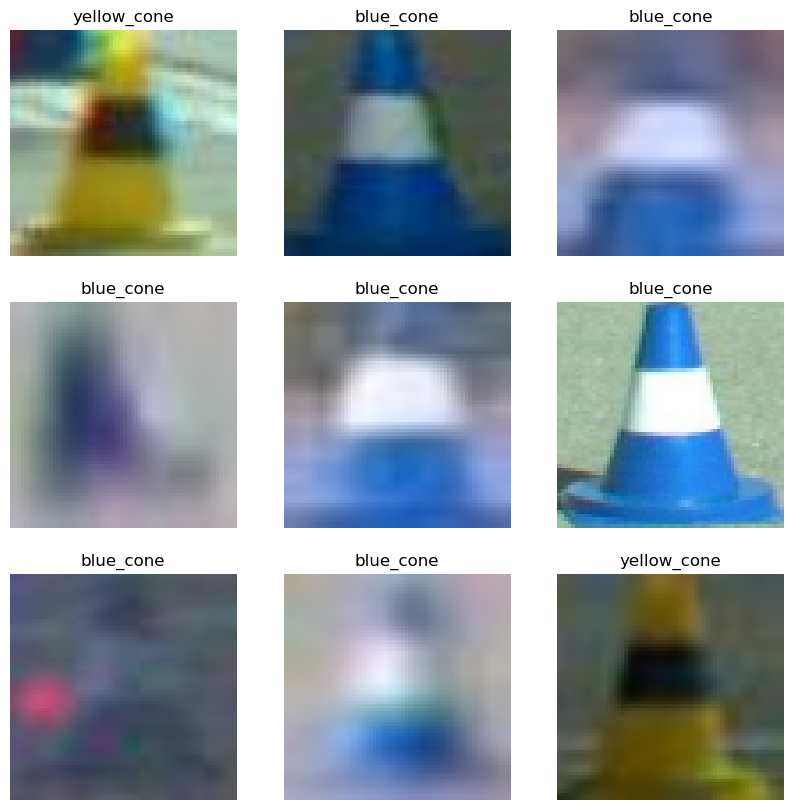

In [101]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [87]:
AUTOTUNE = tf2.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [88]:
num_classes = 5

model = tf2.keras.Sequential([
    tf2.keras.layers.Rescaling(1./255),
    net,
    tf2.keras.layers.Dense(num_classes)
])

In [89]:
model.compile(
    optimizer='adam',
    loss=tf2.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [90]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [133]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=5
)

Epoch 1/5
566/566 [==============================] - 42s 73ms/step - loss: 0.4479 - accuracy: 0.9240 - val_loss: 0.3356 - val_accuracy: 0.9496
Epoch 2/5
566/566 [==============================] - 41s 73ms/step - loss: 0.3080 - accuracy: 0.9433 - val_loss: 0.2796 - val_accuracy: 0.9501
Epoch 3/5
566/566 [==============================] - 41s 72ms/step - loss: 0.2605 - accuracy: 0.9452 - val_loss: 0.3638 - val_accuracy: 0.9129
Epoch 4/5
566/566 [==============================] - 41s 73ms/step - loss: 0.2170 - accuracy: 0.9515 - val_loss: 0.3067 - val_accuracy: 0.9355
Epoch 5/5
566/566 [==============================] - 41s 72ms/step - loss: 0.1866 - accuracy: 0.9564 - val_loss: 0.1566 - val_accuracy: 0.9635


In [134]:
out = model.predict(val_ds.take(1))

1/1 [==============================] - 0s 22ms/step


In [135]:
model.evaluate(val_ds)

142/142 [==============================] - 2s 14ms/step - loss: 0.1566 - accuracy: 0.9635


[0.15660004317760468, 0.9635359048843384]

In [136]:
probability_model = tf2.keras.Sequential([model, 
                                         tf2.keras.layers.Softmax()])

In [137]:
predictions = probability_model.predict(val_ds)

142/142 [==============================] - 3s 14ms/step


In [138]:
np.argmax(predictions[0])
y = np.concatenate([y for x, y in val_ds], axis=0)

In [139]:
correct = 0
for i in range(len(predictions)):
    if np.argmax(predictions[i]) == y[i]:
        correct += 1
print(f"Correct: {correct} out of {len(predictions)} giving {correct/len(predictions)}%")

Correct: 4360 out of 4525 giving 0.96353591160221%


In [140]:
for images, labels in val_ds.take(1):
    for image in images:
        print(image.shape)
        print(np.argmax(probability_model.predict(np.expand_dims(image, 0))))

(64, 64, 3)
1/1 [==============================] - 1s 503ms/step
2
(64, 64, 3)
1/1 [==============================] - 0s 12ms/step
0
(64, 64, 3)
1/1 [==============================] - 0s 12ms/step
0
(64, 64, 3)
1/1 [==============================] - 0s 12ms/step
2
(64, 64, 3)
1/1 [==============================] - 0s 12ms/step
0
(64, 64, 3)
1/1 [==============================] - 0s 13ms/step
0
(64, 64, 3)
1/1 [==============================] - 0s 13ms/step
4
(64, 64, 3)
1/1 [==============================] - 0s 12ms/step
2
(64, 64, 3)
1/1 [==============================] - 0s 12ms/step
4
(64, 64, 3)
1/1 [==============================] - 0s 12ms/step
4
(64, 64, 3)
1/1 [==============================] - 0s 13ms/step
4
(64, 64, 3)
1/1 [==============================] - 0s 13ms/step
2
(64, 64, 3)
1/1 [==============================] - 0s 13ms/step
0
(64, 64, 3)
1/1 [==============================] - 0s 13ms/step
2
(64, 64, 3)
1/1 [==============================] - 0s 13ms/step
0
(64, 64, 

In [ ]:
model.save_weights(node_root + "/model")